In [10]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv("./data/wine.csv", encoding="utf-8")    

print(df.shape)
df.head()

(178, 13)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [40]:
df_norm = (df - df.min()) / (df.max() - df.min())

In [43]:
df_norm.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [44]:
pca = sklearn.decomposition.PCA(2)
pca.fit(df_norm)
pca_array = pca.transform(df_norm)

In [48]:
pca_array[:10]

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722],
       [-0.82164366, -0.58090551],
       [-0.20254638, -0.05946657],
       [-0.60819015, -0.48751919],
       [-0.5440474 , -0.3001965 ],
       [-0.4743575 , -0.29819702],
       [-0.50043201, -0.30760286],
       [-0.62751797, -0.20632823]])

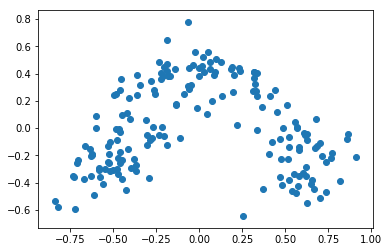

In [46]:
plt.scatter(pca_array[:,0], pca_array[:,1])
plt.show()

In [47]:
# import sklearn.cluster

In [49]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [62]:
X = pca_array
initial_centroid_indices = [0, 1, 2]

In [63]:
N = len(pca_array)
N

178

In [64]:
centroids = X[initial_centroid_indices]
centroids

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722]])

In [66]:
labels = np.zeros(N)
labels

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [93]:
num_clusters = len(initial_centroid_indices)

for i in range(N):
    distances = []
    for k in range(num_clusters):
        k_dist = distance(X[i], centroids[k])
        distances.append(k_dist)
    labels[i] = np.argmin(distances)

In [98]:
labels

array([ 0.,  1.,  2.,  0.,  1.,  0.,  2.,  2.,  2.,  0.,  0.,  2.,  2.,
        0.,  0.,  2.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  2.,  2.,  0.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  1.,  0.,  1.,  1.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,
        0.,  2.,  2.,  2.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,
        2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,
        2.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.])

In [97]:
for k in range(num_clusters):
    x = X[labels == k][:,0]
    y = X[labels == k][:,1]
    
    x = np.mean(x)
    y = np.mean(y)
    centroids[k] = [x, y]

In [99]:
centroids

array([[-0.68388966, -0.37373167],
       [ 0.098774  ,  0.17226483],
       [-0.04523645, -0.32815231]])

In [101]:
def kmeans(X, initial_centroid_indices):
    import time
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)
    
    while True:
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣습니다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용합니다.
        미리 정의된 distance 함수를 사용합니다.
        '''
        num_clusters = len(initial_centroid_indices)

        is_changed = False
        for i in range(N):
            distances = []
            for k in range(num_clusters):
                k_dist = distance(X[i], centroids[k])
                distances.append(k_dist)
            if labels[i] != np.argmin(distances):
                is_changed = True
            labels[i] = np.argmin(distances)
                
        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        으로 합니다.
        '''
        
        for k in range(num_clusters):
            x = X[labels == k][:,0]
            y = X[labels == k][:,1]

            x = np.mean(x)
            y = np.mean(y)
            centroids[k] = [x, y]
        
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝냅니다.
        아니라면 다시 반복합니다.
        '''
        if not is_changed:
            break
    
    return labels

In [103]:
result = kmeans(pca_array, [0, 1, 2])
result

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

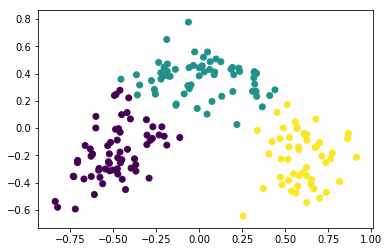

In [104]:
plt.scatter(pca_array[:,0], pca_array[:,1], c=result)
plt.show()